# <font color =dimgrey> Lead Scoring Case Study

## <font color="navy"> Introduction:

X Education, a company that offers online courses for industry professionals, attracts many potential learners to its website daily. These visitors arrive through various marketing channels, including other websites and search engines like Google. Once on the site, they explore courses, watch videos, or fill out a form with their email address or phone number to express interest. At this point, they are categorized as leads. Additionally, the company receives leads through referrals from past clients. The sales team then engages with these leads, making calls and sending emails in an effort to convert them into customers. However, only about 30% of these leads typically end up enrolling in a course.

## <font color="navy"> Problem Statement:

Despite receiving a significant number of leads, X Education struggles with a low conversion rate. For instance, if they acquire 100 leads in a day, only around 30 of them actually enroll in a course. To improve this, the company wants to pinpoint the most promising leads, often referred to as "Hot Leads." By focusing their efforts on these high-potential leads, the sales team can boost the conversion rate, spending more time engaging with those most likely to enroll instead of reaching out to everyone.

## <font color="navy"> Business Goal:
X Education has tasked us with helping them identify the most promising leads—those most likely to convert into paying customers. Our job is to develop a model that assigns a lead score to each lead, where a higher score indicates a greater chance of conversion, and a lower score suggests the lead is less likely to convert. The CEO has set an ambitious goal, aiming for a lead conversion rate of around 80%.

#### Goals of the Case Study

The objectives of this case study include:

- **Build a Logistic Regression Model**: Develop a model that assigns a lead score between 0 and 100 to each lead. This score will help the company focus on the hottest leads—those most likely to convert into customers—while deprioritizing colder leads.

- **Adapt to Future Requirements**: The company has outlined additional challenges that the model should be able to handle as their needs evolve. These challenges are detailed in a separate document, which you’ll need to address after developing the initial logistic regression model. Be sure to incorporate these aspects into your final recommendations when presenting the results.
.

## <font color="navy"> Data Set used in this assignment:

We've been given a dataset containing approximately 9,000 past leads to work with. This dataset includes various attributes like Lead Source, Total Time Spent on the Website, Total Visits, Last Activity, and more. Some of these factors might be relevant in determining whether a lead will convert into a customer, while others may not be as significant. The key focus here is on the target variable, 'Converted,' which indicates whether a lead was successfully converted—where 1 means the lead was converted and 0 means it was not.

The dataset for this case study is titled "Leads."

# Step 1 : Importing Libraries

In [1]:
#Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve


# Step 2 : Reading and Understanding the data set


In [3]:
#Importing the data set using pandas
lead_initial = pd.read_csv('Leads.csv')

In [4]:
#Inspect the first 5 rows
lead_initial.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#Let's check the dimensions of the dataframe
print('shape')
lead_initial.shape

shape


(9240, 37)

In [6]:
#let's look at the statistical aspects of the dataframe
print('*********************************statistical aspects*********************************')
lead_initial.describe()

*********************************statistical aspects*********************************


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Observation:

From above statistical summary we can see that column 'TotalVisits','Total Time Spent on Website','Page Views Per Visit' having outliers ,cause there is significant difference between min and max values.

In [7]:
#Let's see the type of each column
print('******************************columns*******************************')
lead_initial.info()

******************************columns*******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-nul

In [8]:
#Checking for null values

print('************columns having null values************')
print(lead_initial.isnull().any())


************columns having null values************
Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                       True
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                       True
Total Time Spent on Website                      False
Page Views Per Visit                              True
Last Activity                                     True
Country                                           True
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                   True
What matters most to you in choosing a course     True
Search                                           False
Magazine      

In [9]:
#Checkin the numbers of null values
lead_initial.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

# Step 3: Quality Check and Data Cleaning

In [10]:
#Checking the datatype of columns:-

lead_initial.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

# Observation:

* Total 7 numeric columns (float and int datatype) and 30 categorical columns (object datatype).
* None of the columns have inconsistent datatype, hence no conversion is required.


In [11]:
#Checking for duplicates and dropping the entire duplicate row if any:-

lead_initial.drop_duplicates(subset=None, inplace=True)

In [12]:
#Checking shape after dropping duplicates:-
lead_initial.shape

(9240, 37)

# Observation:

Since the shape before and after dropping duplicate is same hence it seems no duplicate values in the dataset.


In [13]:
#Checking for percentage of null values in each column

percent_missing = round(100*(lead_initial.isnull().sum()/len(lead_initial.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

# Observation:

There are some columns that have more than 25% null values.




# Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value 

In [14]:
#Finding column names in which 'Select' level is available:-

cols=list(lead_initial.columns)
for i in cols:
    if 'Select' in lead_initial[i].values:
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


# These columns are: 'Specialization','How did you hear about X Education', 'Lead Profile' and City.                                            

In [15]:
#Convert these values as NAN as its of no use as the customer did not enter anything while filling up the form
lead_initial['Specialization'] = lead_initial['Specialization'].replace('Select', np.nan)
lead_initial['How did you hear about X Education'] = lead_initial['How did you hear about X Education'].replace('Select', np.nan)
lead_initial['Lead Profile'] = lead_initial['Lead Profile'].replace('Select', np.nan)
lead_initial['City'] = lead_initial['City'].replace('Select', np.nan)

In [16]:
#Checking for percentage of null values in each column after converting "SELECT" into NAN.

percent_missing = round(100*(lead_initial.isnull().sum()/len(lead_initial.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Let us drop the following columns that have more than 30% null values


These columns are: Specialization, How did you hear about X Education, Tags, Lead Quality, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score and Asymmetrique Profile Score

In [17]:
lead_initial = lead_initial.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [18]:
#Checking for percentage of null values in each column after dropping columns having more than 30% null values

percent_missing = round(100*(lead_initial.isnull().sum()/len(lead_initial.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Some columns still have null values :Lead Source, TotalVisits, Page Views Per Visit, Last Activity, Country, What is your current occupation, What matters most to you in choosing a course.
Let us see and decide whather we need to impute values in the above columns or drop the columns.

# Let's check the value counts in all the columns having null values

In [19]:
#Checking value counts in "country column"
lead_initial.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [20]:
#Checking the percentage of India as value in the "country column"

country_percentage = round(100*len(lead_initial[lead_initial['Country'] == 'India'])/len(lead_initial['Country']),2)
print(country_percentage)

70.26


Since "India" occurs around 70.26% of times in the Country column, and country column also has around 26.63% as missing values, it is better to drop the column

In [21]:
#Dropping the country column
lead_initial = lead_initial.drop(['Country'], axis=1)

In [22]:
#Checking the value counts for the column "Lead Source"

lead_initial['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

From the above it can be noticed that Google appears twice with different cases. Hence we shall convert all rows with value "Google" to the same case. Also, since "Google" has the major chunk of data, we can impute the null values with Google

In [23]:
lead_initial['Lead Source'] = lead_initial['Lead Source'].replace('google', 'Google')
lead_initial['Lead Source'] = lead_initial['Lead Source'].replace(np.nan, 'Google')

In [24]:
#Checking the value counts for the column "Total Visits"
lead_initial['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [25]:
#Let's check the median of column 

lead_initial['TotalVisits'].median()

3.0

In [26]:
#We shall impute the null values in TotalVisits by the median value i.e. 3.0

lead_initial['TotalVisits'] = lead_initial['TotalVisits'].replace(np.nan, lead_initial['TotalVisits'].median())

In [27]:
#Checking the value counts for "Page Views Per Visit"

lead_initial['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [28]:
#Let's check the median of the column

lead_initial['Page Views Per Visit'].median()

2.0

In [29]:
#We shall impute the null values in 'Page Views Per Visit' by the median value i.e. 2.0

lead_initial['Page Views Per Visit'] = lead_initial['Page Views Per Visit'].replace(np.nan, lead_initial['Page Views Per Visit'].median())

In [30]:
#Checking the value counts for the column "Last Activity"

lead_initial['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [31]:
#Since we do not have any information of what the last activity of the customer would have been, we can add a new category called 'Not Sure' for the null values

lead_initial['Last Activity'] = lead_initial['Last Activity'].replace(np.nan, 'Not Sure')

In [32]:
#Checking the value counts for the column "What is your current Occupation"

lead_initial['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [33]:
#Since no information has been provided about Current Occupation, we can add a new category called No Information and set that as value for the null columns
lead_initial['What is your current occupation'] = lead_initial['What is your current occupation'].replace(np.nan, 'No Information')

In [34]:
#Checking the value counts for the column "What matters most to you in choosing a course"
lead_initial['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [35]:
matters_percentage = round(100*len(lead_initial[lead_initial['What matters most to you in choosing a course'] == 'Better Career Prospects'])/len(lead_initial['What matters most to you in choosing a course']),2)
print(matters_percentage)

70.65


In [36]:
#Since Better Career Prospects occurs around 70.65% of times in the What matters most to you in choosing a course column and the column also has around 29.32% as missing values, we shall go ahead and drop the column

lead_initial = lead_initial.drop(['What matters most to you in choosing a course'], axis=1)

Since all the columns have been checked having null values let's verify it again

In [37]:
#Checking for percentage of null values in each column after handling all the columns

percent_missing = round(100*(lead_initial.isnull().sum()/len(lead_initial.index)), 2)
print(percent_missing)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

# Observation:
 All the null values have been either imputed or dropped so now we are left with zero null values
 

Few columns have only one option "No". Those columns are : Magazine, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content and I agree to pay the amount through cheque.



 

In [38]:
#Let's drop those columns having only no in them as it is of no use
lead_initial = lead_initial.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [39]:
#Let's check the shape after dropping
lead_initial.shape

(9240, 20)

# Observation:
We had 37 columns when we started with the data now we are left with 20.

In [40]:
#Let's check those 20 columns.
lead_initial.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

# Outlier Treatment

In [41]:
lead_initial.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


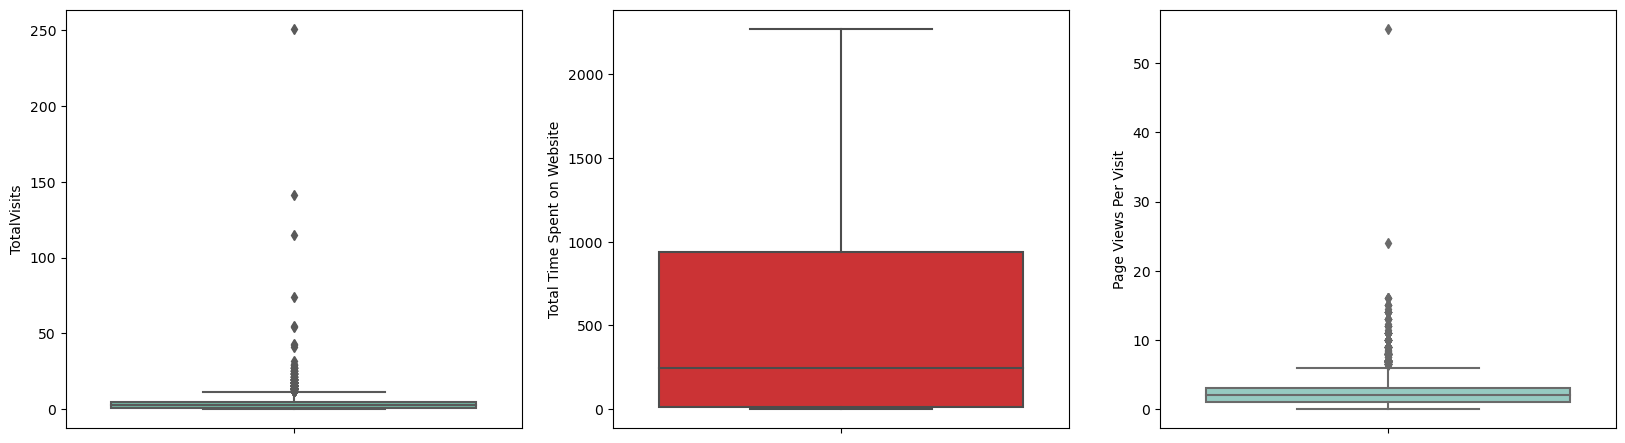

In [42]:
#Let's check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set2', data = lead_initial)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set1', data = lead_initial)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = lead_initial)
plt.show()

# Observation:
From the above, it can be seen that outlier exists in the columns TotalVisits and Page Views Per Visit columns.

In [43]:
#Removing values beyond 99% for Total Visits

quartile_total_visits = lead_initial['TotalVisits'].quantile(0.99)
lead_initial = lead_initial[lead_initial["TotalVisits"] < quartile_total_visits]
lead_initial["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [44]:
#Checking outliers at 25%,50%,75%,90%,95% and above

lead_initial.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9141.00000,9141.000000,9141.000000,9141.000000,9141.000000
mean,617233.45192,0.385406,3.179740,486.074609,2.329506
std,23413.72193,0.486718,2.913631,547.856302,2.046673
min,579533.00000,0.000000,0.000000,0.000000,0.000000
25%,596519.00000,0.000000,1.000000,10.000000,1.000000
50%,615563.00000,0.000000,3.000000,247.000000,2.000000
75%,637414.00000,1.000000,5.000000,933.000000,3.000000
90%,650514.00000,1.000000,7.000000,1379.000000,5.000000
95%,655406.00000,1.000000,9.000000,1561.000000,6.000000
99%,659592.80000,1.000000,13.000000,1839.600000,9.000000


In [45]:
#Removing values beyond 99% for page Views Per Visit

quartile_page_visits = lead_initial['Page Views Per Visit'].quantile(0.99)
lead_initial = lead_initial[lead_initial["Page Views Per Visit"] < quartile_page_visits]
lead_initial["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [46]:
#Checking outliers at 25%,50%,75%,90%,95% and above
lead_initial.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,617223.248422,0.385092,3.087164,483.133016,2.226383
std,23372.383121,0.486644,2.801244,547.420675,1.823395
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596530.000000,0.000000,1.000000,7.000000,1.000000
50%,615645.000000,0.000000,3.000000,245.000000,2.000000
75%,637360.000000,1.000000,4.000000,929.000000,3.000000
90%,650463.200000,1.000000,7.000000,1378.000000,5.000000
95%,655351.600000,1.000000,8.000000,1558.000000,6.000000
99%,659577.800000,1.000000,13.000000,1839.720000,7.000000


In [47]:
#Let's determine the percentage of data retained

retained_data = round(100*(len(lead_initial)/9240),2)
print(retained_data)

97.72


# Observation:
 The data has been cleaned and around 98% of data has been retained.

# Step 4: Exploratory Data Analysis

In [48]:
#Let's check the columns again
lead_initial.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [49]:
lead_initial.columns.value_counts()

Prospect ID                               1
Lead Number                               1
A free copy of Mastering The Interview    1
Through Recommendations                   1
Digital Advertisement                     1
Newspaper                                 1
X Education Forums                        1
Newspaper Article                         1
Search                                    1
What is your current occupation           1
Last Activity                             1
Page Views Per Visit                      1
Total Time Spent on Website               1
TotalVisits                               1
Converted                                 1
Do Not Call                               1
Do Not Email                              1
Lead Source                               1
Lead Origin                               1
Last Notable Activity                     1
dtype: int64

# Univariate Analysis for all categorical columns

# As per our problem statement "Converted" is our target variable

The target variable indicates whether a lead has been successfully converted or not.
* 0: Not converted into lead.
* 1: Lead has been successfully Converted.

In [50]:
#calculating the conversion rate
Converted = (sum(lead_initial['Converted'])/len(lead_initial['Converted'].index))*100
Converted

38.50924797873519

# Observation:
There is a overall conversion rate of around 39% (38.509)

In [51]:
#Checking the distribution in "Converted" column
#Checking value count of target variable 'Converted'

lead_initial.Converted.value_counts()

0    5552
1    3477
Name: Converted, dtype: int64

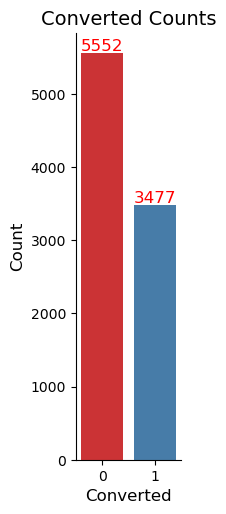

In [52]:
# Conversion Rate 

plot = sns.catplot(x="Converted", kind="count", data=lead_initial, palette="Set1", aspect= 0.4);

plt.title('Converted Counts', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='red', ha='center', va='bottom')
    
plt.show()

# Observation:
 * From the above graph we can infer that only 3477 is considered as "Hot leads" (1)
 * And about 5552 are not converted into leads (0).

# Let's look at the relation between all categorical columns and the converated column.

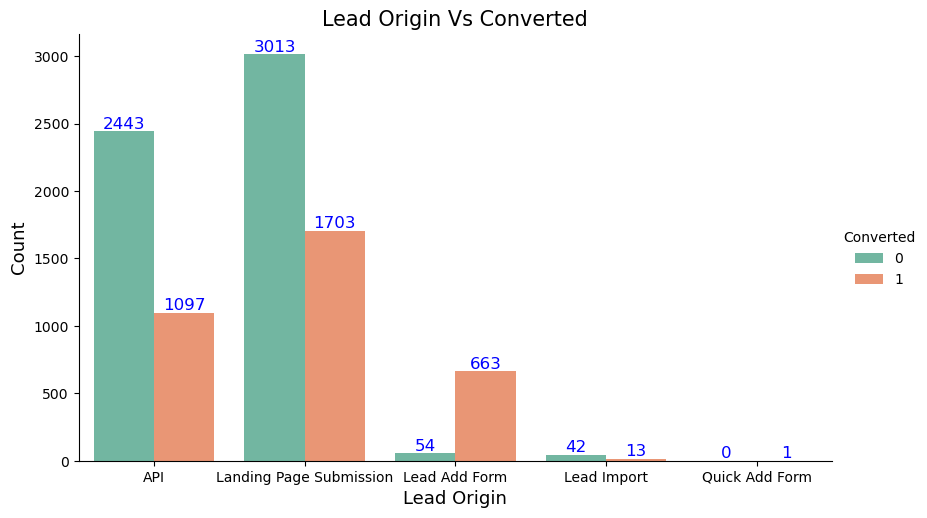

In [53]:
#Lead Origin and Converted Column

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=lead_initial, palette="Set2", aspect= 1.7);

plt.title('Lead Origin Vs Converted', fontsize = 15)
plt.xlabel("Lead Origin", fontsize = 13)
plt.ylabel("Count", fontsize = 13)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

# Observation:

* From the above graph, it can be seen that the maximum conversion happened from Landing Page Submission 1 - 1703, 0 - 3013.
* Also there was only one request from Quick Add Form which got converted.
* Second most conversion happened from API 1- 1097, 0 - 2443.

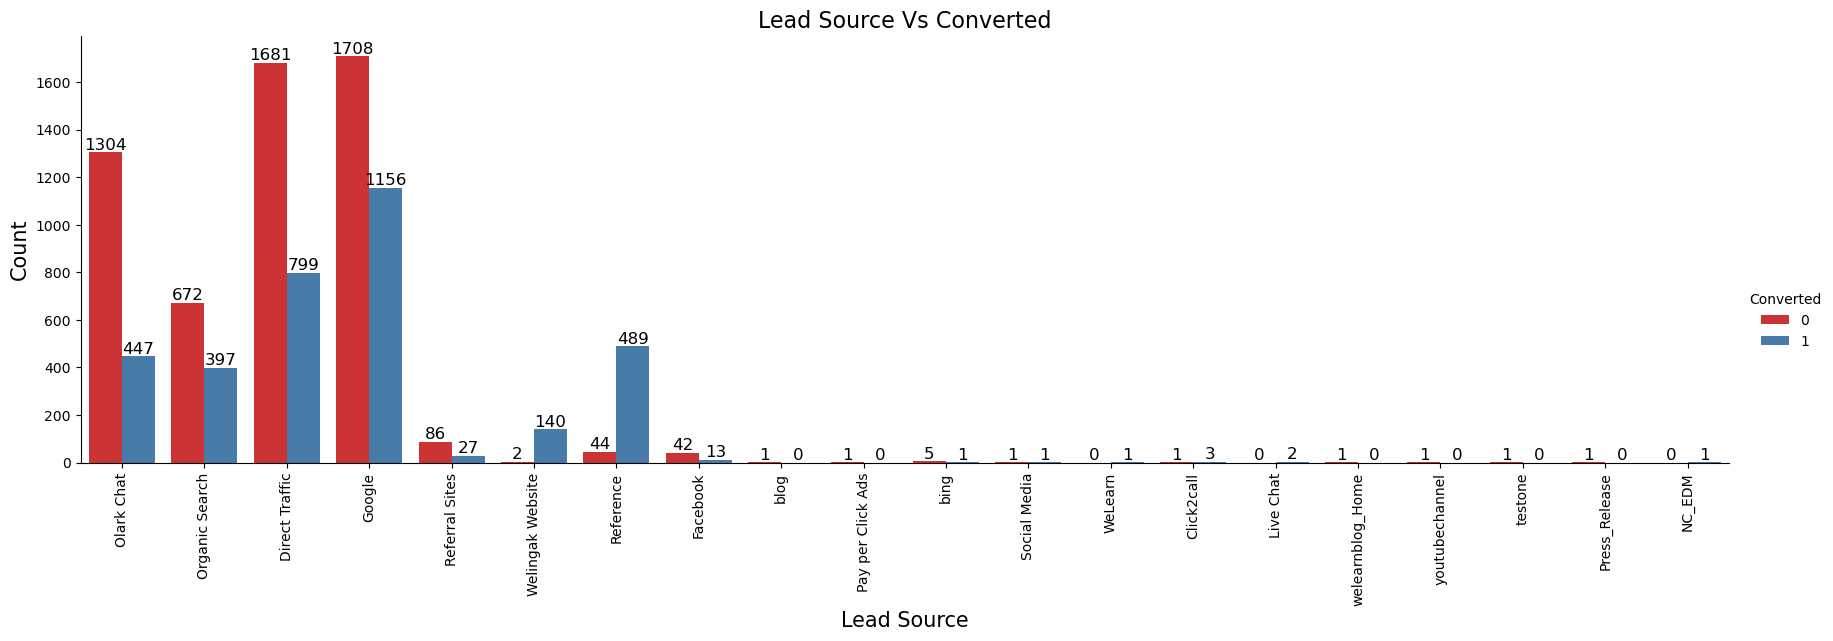

In [54]:
#Lead Source and the Converted Column

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=lead_initial, palette="Set1", aspect = 3.5);

plt.title('Lead Source Vs Converted', fontsize = 16)
plt.xlabel("Lead Source", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.xticks(rotation=90)

# Print the counts
ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')
   
plt.show()

# Observation:
* Maximum conversion happened from Google 1 - 1156, 0 - 1708.
* Second most conversion happened from Direct Traffic 1- 799, 0 - 1681.

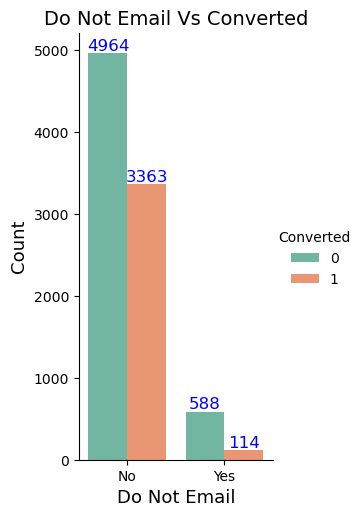

In [55]:
#Do not Email and the Converted Column

plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=lead_initial, palette="Set2", aspect = 0.6);

plt.title('Do Not Email Vs Converted', fontsize = 14)
plt.xlabel("Do Not Email", fontsize = 13)
plt.ylabel("Count", fontsize = 13)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

# Observation:
* Based on the above graph, major conversion has happened from the emails that have been sent.

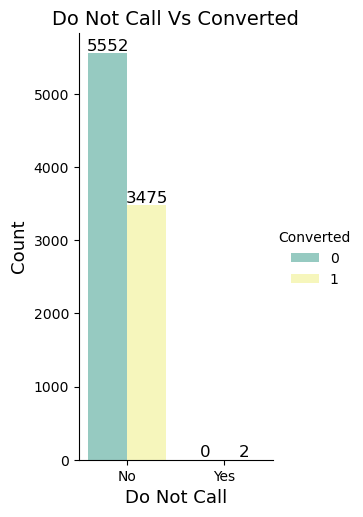

In [56]:
#Do not Call and the Coverted Column

plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=lead_initial, palette="Set3", aspect = 0.6);

plt.title('Do Not Call Vs Converted', fontsize = 14)
plt.xlabel("Do Not Call", fontsize = 13)
plt.ylabel("Count", fontsize = 13)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')

plt.show()

# Observation:
* From the above graph, it can be noticed that major conversions happened when calls were made. 
* However, it can also be seen that 2 leads opted for "Do Not Call", but they still got converted.

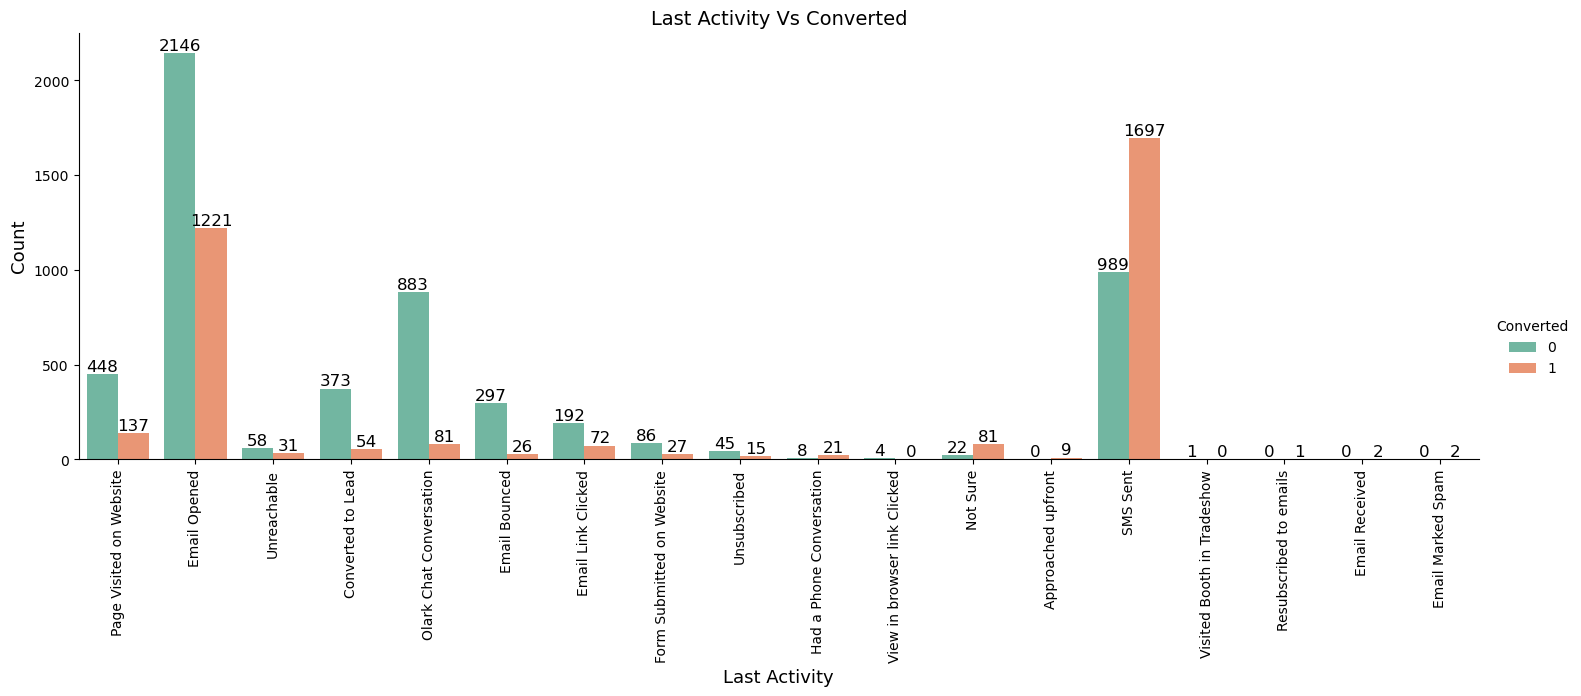

In [57]:
#Last Activity and the Converted Column

plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=lead_initial, palette="Set2", aspect = 3.0);

plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 13)
plt.ylabel("Count", fontsize = 13)
plt.xticks(rotation = 90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')

plt.show()

# Observation:
* As per the above graph, Last Activity value of 'SMS Sent' had more conversion.
* Highest last activity of leads is 'Email Opened'

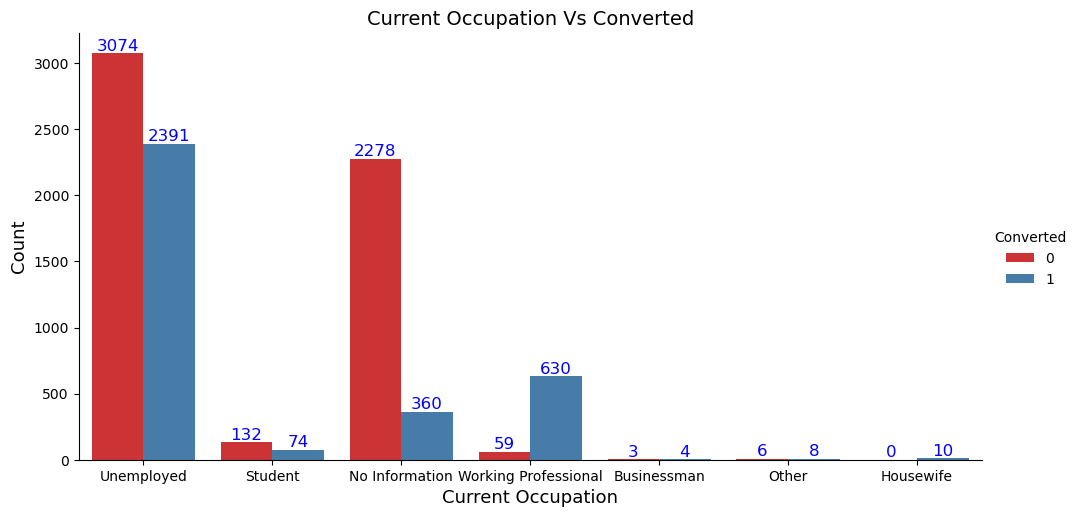

In [58]:
#What is your current occupation and the Converted Column

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=lead_initial, palette="Set1", 
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 13)
plt.ylabel("Count", fontsize = 13)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

# Observation:
* More conversion happened with people who are unemployed. 
* We can also infer from the above data that - Out of 7 business men, 4 got converted.
* Out of 10 housewives, all 10 leads got converted.
* 74 students got converted into leads.

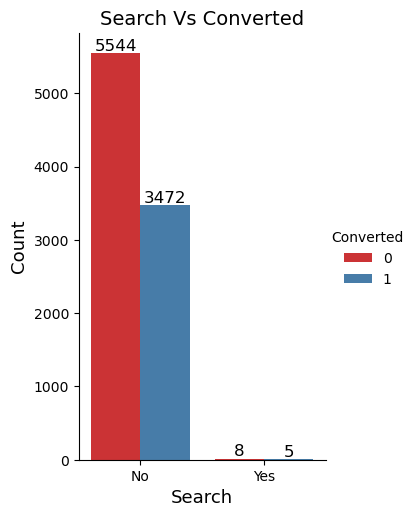

In [59]:
#Search and the Converted Column

plot = sns.catplot(x="Search", hue = "Converted", kind="count", data=lead_initial, palette="Set1", aspect = 0.7);

plt.title('Search Vs Converted', fontsize = 14)
plt.xlabel("Search", fontsize = 13)
plt.ylabel("Count", fontsize = 13)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

# Observation:

Conversion rate is high on leads who are not through search.

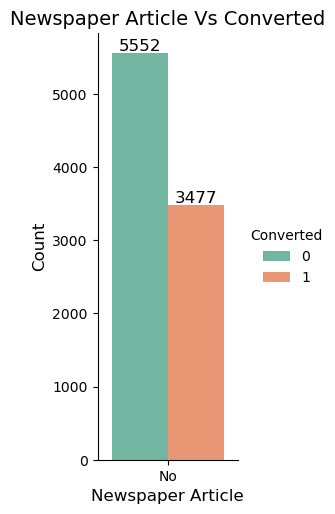

In [62]:
#Newspaper Article and Converted Column
plot = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=lead_initial, palette="Set2", aspect = 0.5);

plt.title('Newspaper Article Vs Converted', fontsize = 14)
plt.xlabel("Newspaper Article", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()


# Observation:

Since "Newspaper Article" column now has only one value for all rows - "No" , it is safe to drop this column.

In [63]:
#Dropping Newspaper Article

lead_initial = lead_initial.drop(['Newspaper Article'], axis=1)

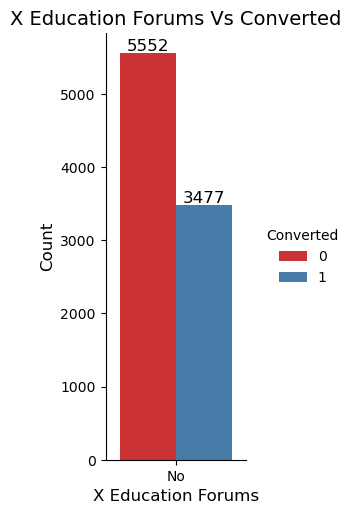

In [65]:
#X Education Forums and Converted Column

plot = sns.catplot(x="X Education Forums", hue = "Converted", kind="count", data=lead_initial, palette="Set1", aspect = 0.5);

plt.title('X Education Forums Vs Converted', fontsize = 14)
plt.xlabel("X Education Forums", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

# Observation:
Since "X Education Forums" column now has only one value for all rows - "Yes" , it is safe to drop this column.

In [68]:
#Dropping X Education Forum column

lead_initial = lead_initial.drop(['X Education Forums'], axis=1)

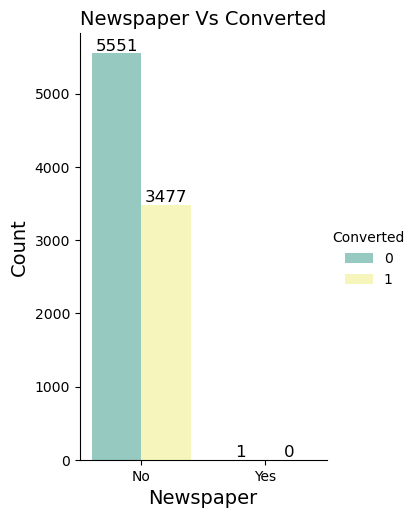

In [69]:
#Newspaper and the Converted Column
plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=lead_initial, palette="Set3", aspect = 0.7);

plt.title('Newspaper Vs Converted', fontsize = 14)
plt.xlabel("Newspaper", fontsize = 14)
plt.ylabel("Count", fontsize = 14)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')

plt.show()

# Observation:
* Since Newspaper column has only one row with "Yes" as the value and further since this lead did not get converted and rest of all the values are "No", we can safely drop the column

In [70]:
#Dropping the Newspaper column

lead_initial = lead_initial.drop(['Newspaper'], axis=1)

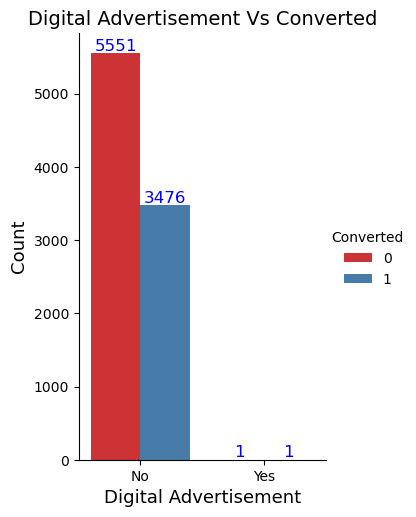

In [71]:
#Digital Advertisement and the Converted Column

plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=lead_initial, palette="Set1", aspect = 0.7);

plt.title('Digital Advertisement Vs Converted', fontsize = 14)
plt.xlabel("Digital Advertisement", fontsize = 13)
plt.ylabel("Count", fontsize = 13)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()


# Observation:
* It can be infered from the graph that there were 2 leads that came from Digital Advertisement of which one lead got converted.



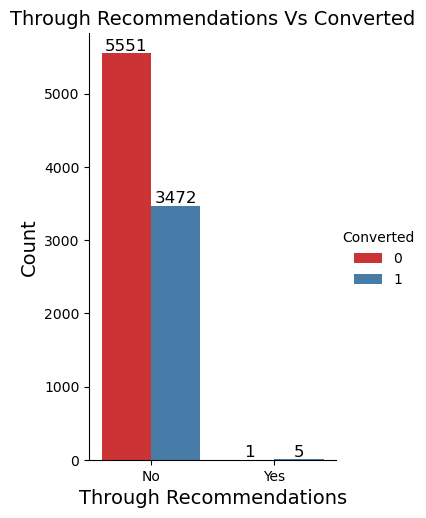

In [73]:
#Through Recommendations and the Converted Column

plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=lead_initial, palette="Set1", aspect = 0.7);

plt.title('Through Recommendations Vs Converted', fontsize = 14)
plt.xlabel("Through Recommendations", fontsize = 14)
plt.ylabel("Count", fontsize = 14)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

# Observation:
* It can be seen that a total of 6 leads came Through Recommendations of which 5 leads got converted.

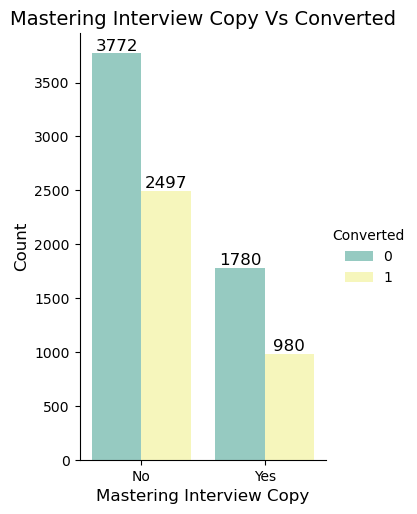

In [78]:
#A free copy of Mastering The Interview and the Converted Column


plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=lead_initial, palette="Set3",
                   aspect = 0.7)

plt.title('Mastering Interview Copy Vs Converted', fontsize = 14)
plt.xlabel("Mastering Interview Copy", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

# Observation:
* Conversion rate is high on leads who do not want a free copy of Mastering Interviews.
* People who want a free copy of mastering the interviews are 980 who got converted.


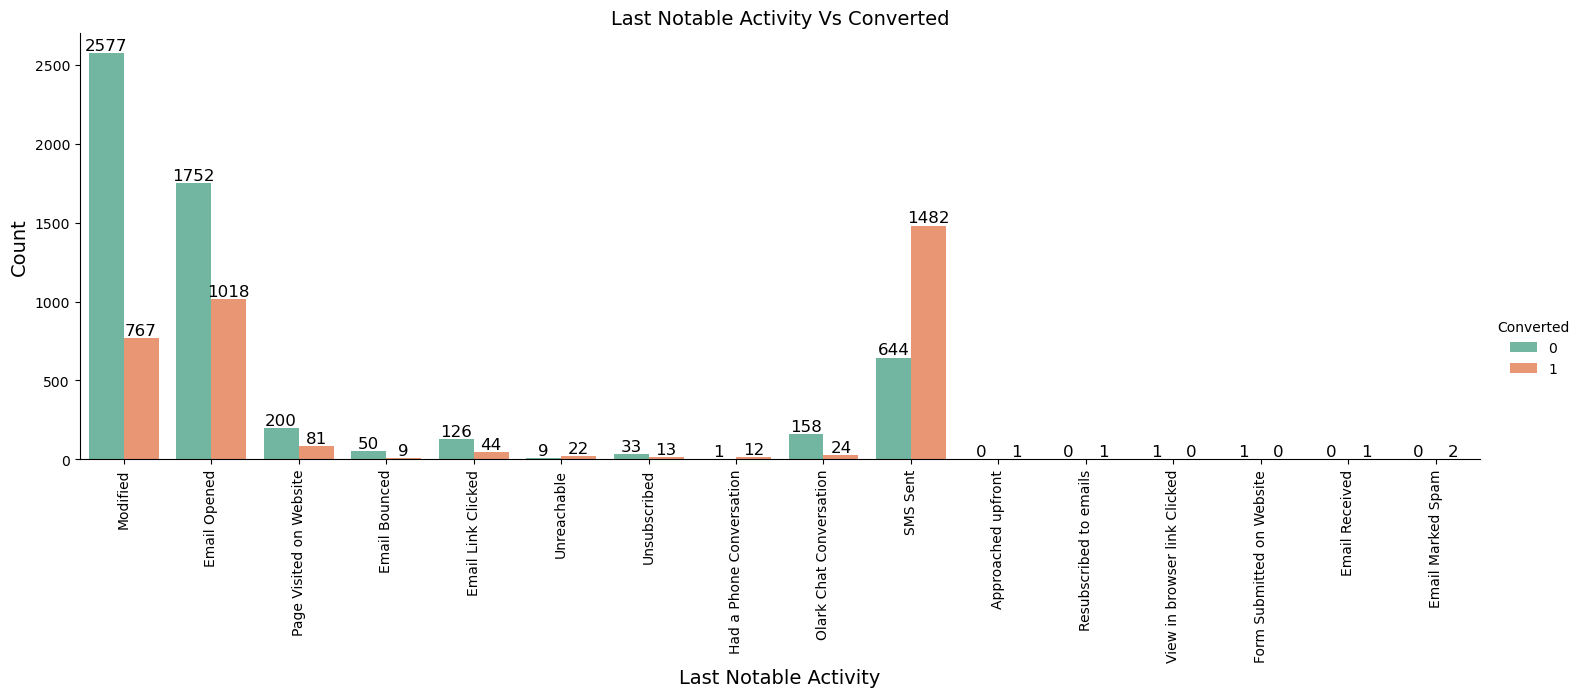

In [80]:
#Last Notable Activity and the Converted Column

plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=lead_initial, palette="Set2", aspect = 3.0);

plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')

plt.show()

# Observation:
* It can be noticed that the conversion rate is high for "SMS Sent" i.e 1482.

# Let's look at the relation between all numerical columns and the converated column.

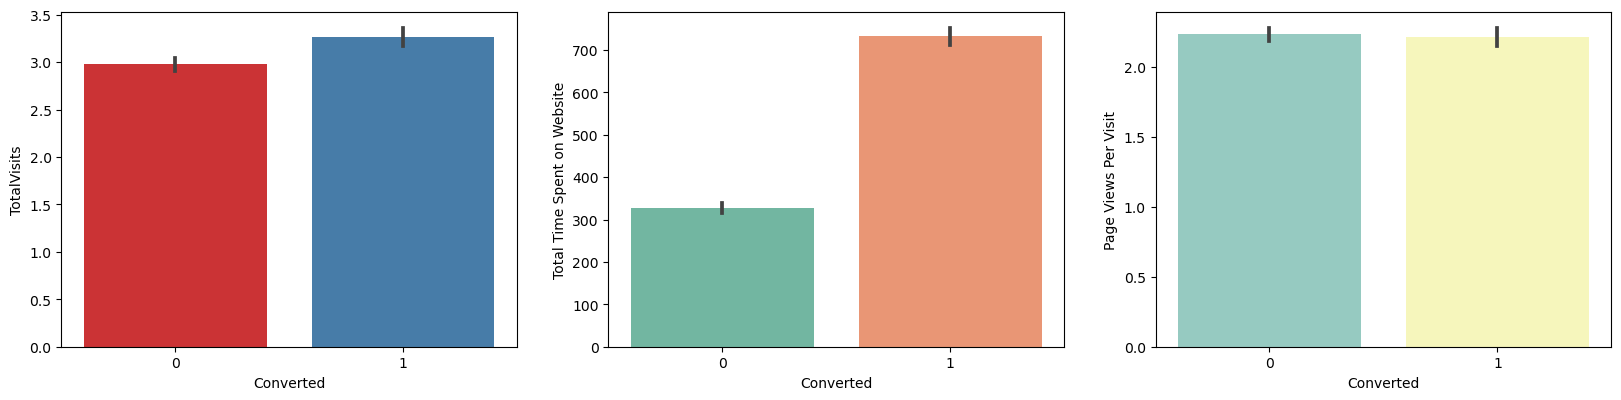

In [81]:
#The conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set1', data = lead_initial)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = lead_initial)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set3', data = lead_initial)
plt.show()

# Bivariate Analysis

# Observation:

* The conversion rate are high for Total Visits, Total Time Spent on Website and Page Views Per Visit

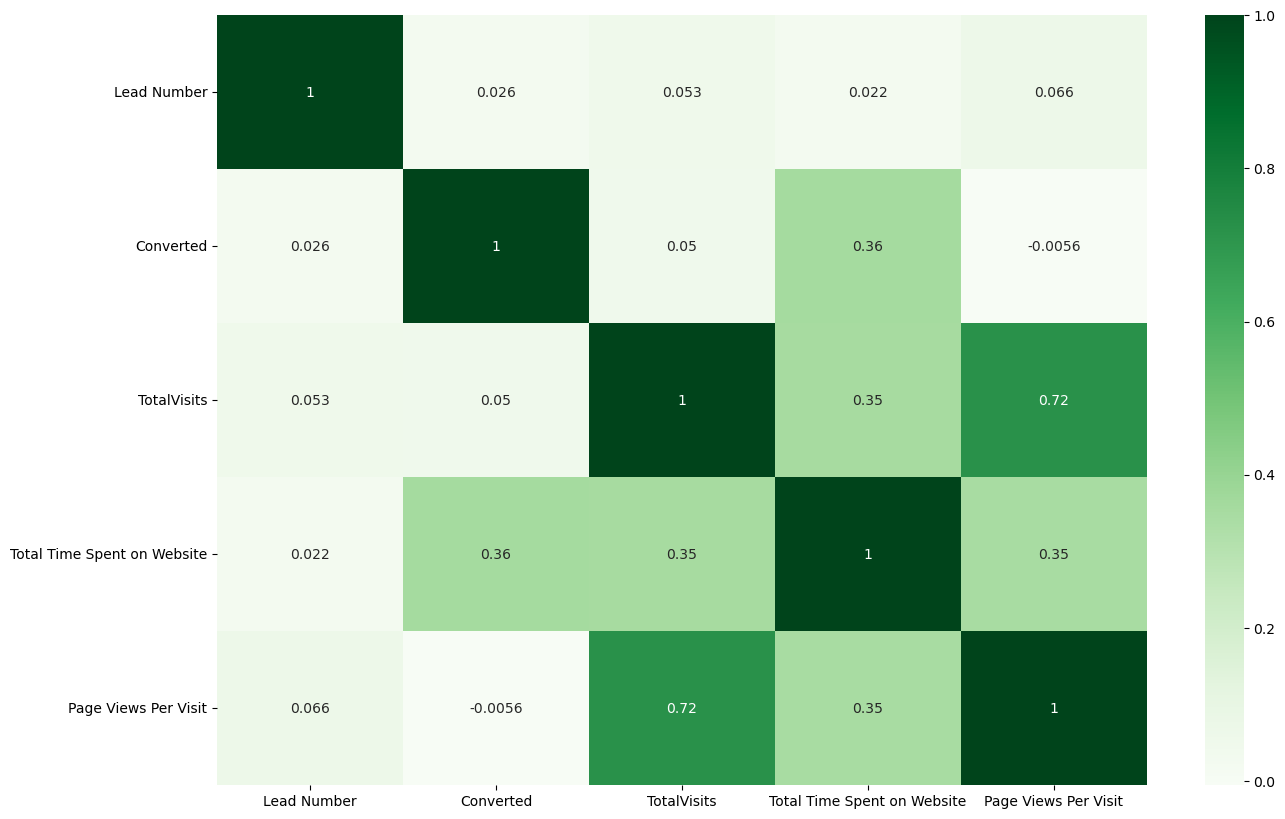

In [85]:
#Heatmap to understand the attributes correlation:-

plt.figure(figsize = (15,10))        
ax = sns.heatmap(lead_initial.corr(),annot = True,cmap='Greens')

# Observation:
* 'TotalVisits' and 'Page Views per Visit' are highly correlated with correlation of .72.
* 'Total Time Spent on Website' has correlation of 0.36 with target variable 'Converted'.

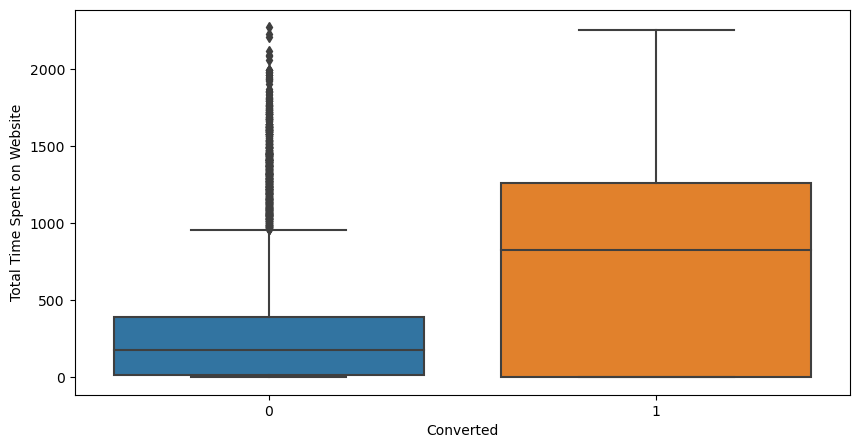

In [86]:
#Plotting box plot of "Total Time Spent on Website" vs Converted variable to check data distribution:-

plt.figure(figsize=(10,5))
sns.boxplot(x='Converted', y='Total Time Spent on Website',data=lead_initial)
plt.show()

# Observation:
Leads spending more time on website are more likely to opt for curses or converted.

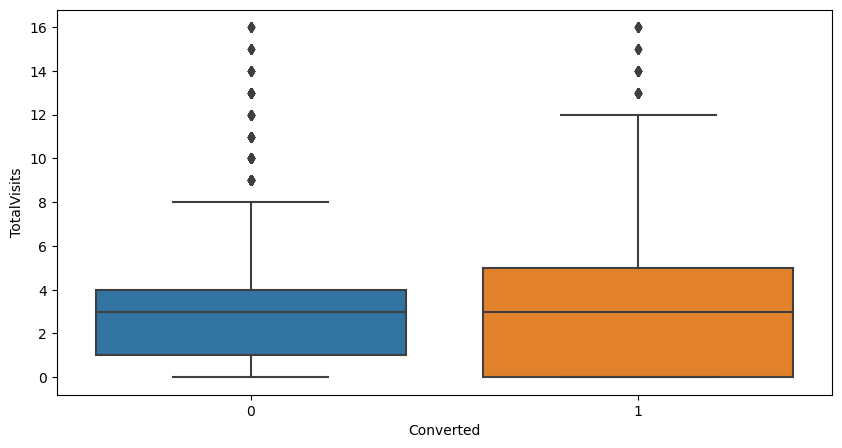

In [87]:
#Plotting box of "Total Visits" vs Converted variable to check data distribution

plt.figure(figsize=(10,5))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_initial)
plt.show()

# Observation:
From above box plot we can see that median for converted and non-converted is approx same.

# Step 5: Data Preparation in Logistic Regression

Converting all the categorical Variables that are having yes/no  to 1 and 0.

In [88]:
#creating a variable list for all the columns having yes/no
variable_list =  ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

#Applying the function to the columns

lead_initial[variable_list] = lead_initial[variable_list].apply(binary_map)

In [89]:
#Checking the top 5 rows after the mapping

lead_initial.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,0,0,0,Modified


# Creating Dummy Variables for all the categorical columns where the no. of categories > 2

In [90]:
#Creating dummies for the following columns below:

#Lead Origin : 

lead_origin = pd.get_dummies(lead_initial['Lead Origin'], prefix='LeadOrigin')
#Dropping quick Add Form column
lead_origin1 = lead_origin.drop(['LeadOrigin_Quick Add Form'], 1)
#Adding the results to the master dataframe
lead_initial = pd.concat([lead_initial, lead_origin1], axis = 1)

#Lead Source :

lead_source = pd.get_dummies(lead_initial['Lead Source'], prefix='LeadSource')
#Dropping blog column
lead_source1 = lead_source.drop(['LeadSource_NC_EDM'], 1)
#Adding the results to the master dataframe
lead_initial = pd.concat([lead_initial, lead_source1], axis=1)

#last Activity :

last_activity = pd.get_dummies(lead_initial['Last Activity'], prefix='LastActivity')
#Dropping Resubscribed to emails column
last_activity1 = last_activity.drop(['LastActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
lead_initial = pd.concat([lead_initial, last_activity1], axis=1)

#What is your current occupation :

curr_occupation = pd.get_dummies(lead_initial['What is your current occupation'], prefix='CurrentOccupation')
#Dropping No Information column
curr_occupation1 = curr_occupation.drop(['CurrentOccupation_Businessman'], 1)
# Adding the results to the master dataframe
lead_initial = pd.concat([lead_initial, curr_occupation1], axis=1)

#Last Notable Activity :

last_notable_activity = pd.get_dummies(lead_initial['Last Notable Activity'], prefix='LastNotableActivity')
#Dropping Resubscribed to emails column
last_notable_activity1 = last_notable_activity.drop(['LastNotableActivity_Resubscribed to emails'], 1)
#Adding the results to the master dataframe
lead_initial = pd.concat([lead_initial, last_notable_activity1], axis=1)

lead_initial.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,1,0,0,0,0,0,0


In [91]:
#Remove following columns from the lead_initial :Prospect ID, Lead Number, Lead Origin, Lead Source, Last Activity, What is your current occupation and Last Notable Activity

lead_initial = lead_initial.drop(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Last Activity',
                          'What is your current occupation', 'Last Notable Activity'], axis=1)

In [92]:
#Let's check the info again after dropping
lead_initial.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9029 non-null   int64  
 1   Do Not Call                                       9029 non-null   int64  
 2   Converted                                         9029 non-null   int64  
 3   TotalVisits                                       9029 non-null   float64
 4   Total Time Spent on Website                       9029 non-null   int64  
 5   Page Views Per Visit                              9029 non-null   float64
 6   Search                                            9029 non-null   int64  
 7   Digital Advertisement                             9029 non-null   int64  
 8   Through Recommendations                           9029 non-null   int64  
 9   A free copy of Mast

In [93]:
#Check for the shape again
lead_initial.shape

(9029, 71)

# Observation:
* Since there are around 71 columns, we will not be looking at the correlation using heat map as we will not be able to infer anything from the heat map due to huge data.

In [94]:
#Let's verify the null values
#Check for percentage of null values in each column

percent_missing = round(100*(lead_initial.isnull().sum()/len(lead_initial.index)), 2)
print(percent_missing)

Do Not Email                                        0.0
Do Not Call                                         0.0
Converted                                           0.0
TotalVisits                                         0.0
Total Time Spent on Website                         0.0
                                                   ... 
LastNotableActivity_Page Visited on Website         0.0
LastNotableActivity_SMS Sent                        0.0
LastNotableActivity_Unreachable                     0.0
LastNotableActivity_Unsubscribed                    0.0
LastNotableActivity_View in browser link Clicked    0.0
Length: 71, dtype: float64


No null values are there so we can directly go for the model building

# Step 6 : Model Building

# Step 6.1: Train - Test Split

In [95]:
#Let's first drop the target variable from X

X = lead_initial.drop(['Converted'], axis=1)
X.head()


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [96]:
#Putting the target variable to y

y = lead_initial['Converted']
y.head()


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [100]:
#Checking the shape before splitting
lead_initial.shape

(9029, 71)

In [97]:
#Splitting the dataframe into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [98]:
#Checking the shape of training datatset
X_train.shape

(6320, 70)

In [99]:
#Checking the shape of testing datatset
X_test.shape

(2709, 70)

# Step 6.2 :Feature Scaling for continuous variables

# We will be rescaling the features with MinMax Scaling

In [101]:
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
2240,0,0,0.1875,0.898963,0.375,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0.3125,0.706360,0.625,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4132,0,0,0.3750,0.768155,0.750,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5573,0,0,0.1250,0.028868,0.250,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1109,0,0,0.0625,0.009021,0.125,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [102]:
#Checking the Conversion Rate percentage

converted = (sum(lead_initial['Converted'])/len(lead_initial['Converted'].index))*100
converted

38.50924797873519


We cross verified again about the conversion rate which is about 39%.

# Step 6.3 : Initial Model Building

We will be using the StatsModel

In [103]:
#Logistic regression model 1
lm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6259
Model Family:                Binomial   Df Model:                           60
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 14 Aug 2023   Deviance:                   1.7170e+05
Time:                        00:21:39   Pearson chi2:                 8.39e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             1.797e+15    6.4e+07   2.81e+07      0.000     1.8e+15     1.8e+15
Do Not Email                                     -4.397e+14   4.48e+06  -9.82e+07      0.000    -4.4e+14    -4.4e+14
Do Not Call                                       4.493e+15   4.76e+07   9.44e+07      0.000    4.49e+15    4.49e+15
TotalVisits                                      -2.924e+14   7.63e+06  -3.83e+07      0.000   -2.92e+14   -2.92e+14
Total Time Spent on Website                       1.435e+15      4e+06   3.58e+08      0.000    1.43e+15    1.43e+15
Page Views Per Visit                             -1.319e+15   6.47e+06  -2.04e+08      0.000   -1.32e+15   -1.32e+15
Search                                           -7.248e+14   2.44e+07  -2.97e+07      0.000   -7.25e+14   -7.25e+14
Digital Advertisement                            -1.064e+15   4.76e+07  -2.24e+07      0.000   -1.06e+15   -1.06e+15
Through Recommendations                           6.798e+14    4.2e+07   1.62e+07      0.000     6.8e+14     6.8e+14
A free copy of Mastering The Interview            3.619e+13   2.69e+06   1.35e+07      0.000    3.62e+13    3.62e+13
LeadOrigin_API                                   -3.209e+15   6.74e+07  -4.76e+07      0.000   -3.21e+15   -3.21e+15
LeadOrigin_Landing Page Submission               -3.532e+15   6.74e+07  -5.24e+07      0.000   -3.53e+15   -3.53e+15
LeadOrigin_Lead Add Form                         -3.596e+15   6.86e+07  -5.24e+07      0.000    -3.6e+15    -3.6e+15
LeadOrigin_Lead Import                           -3.485e+15   8.27e+07  -4.21e+07      0.000   -3.49e+15   -3.49e+15
LeadSource_Click2call                             4.743e+15   4.69e+07   1.01e+08      0.000    4.74e+15    4.74e+15
LeadSource_Direct Traffic                         1.334e+15   1.17e+07   1.14e+08      0.000    1.33e+15    1.33e+15
LeadSource_Facebook                               5.949e+14   4.62e+07   1.29e+07      0.000    5.95e+14    5.95e+14
LeadSource_Google                                 1.286e+15   1.15e+07   1.12e+08      0.000    1.29e+15    1.29e+15
LeadSource_Live Chat                              3.381e+15   4.67e+07   7.23e+07      0.000    3.38e+15    3.38e+15
LeadSource_Olark Chat                             1.415e+15   1.18e+07    1.2e+08      0.000    1.41e+15    1.41e+15
LeadSource_Organic Search                         1.589e+15   1.18e+07   1.35e+08      0.000    1.59e+15    1.59e+15
LeadSource_Pay per Click Ads                        16.9161   5.42e-07   3.12e+07      0.000      16.916      16.916
LeadSource_Press_Release                             3.6535   2.25e-07   1.63e+07      0.000       3.653       3.653
LeadSource_Reference                     

# Step 6.4 : Feature Selection using Recursive Feature Elimination (RFE)

In [104]:
logreg = LogisticRegression()

In [112]:
#Running RFE with 20 variables as output
rfe = RFE(estimator = logreg, n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)

In [113]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False,  True, False,  True, False,  True,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False,  True,
        True, False, False, False,  True, False, False])

In [114]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 13),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', True, 1),
 ('Digital Advertisement', False, 45),
 ('Through Recommendations', False, 30),
 ('A free copy of Mastering The Interview', False, 37),
 ('LeadOrigin_API', False, 9),
 ('LeadOrigin_Landing Page Submission', False, 8),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 20),
 ('LeadSource_Click2call', False, 29),
 ('LeadSource_Direct Traffic', False, 16),
 ('LeadSource_Facebook', False, 10),
 ('LeadSource_Google', False, 27),
 ('LeadSource_Live Chat', False, 38),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 26),
 ('LeadSource_Pay per Click Ads', False, 46),
 ('LeadSource_Press_Release', False, 50),
 ('LeadSource_Reference', True, 1),
 ('LeadSource_Referral Sites', False, 25),
 ('LeadSource_Social Media', False, 41),
 ('LeadSource_WeLearn', False, 47),
 

In [115]:
#Variables shortlisted by RFE

cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'LeadOrigin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Reference',
       'LeadSource_Welingak Website', 'LastActivity_Approached upfront',
       'LastActivity_Email Opened', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Housewife', 'CurrentOccupation_No Information',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified', 'LastNotableActivity_Unreachable'],
      dtype='object')

# Step 6.5: Model Building 2

In [116]:
X_train_sm = sm.add_constant(X_train[cols])
lm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2501.1
Date:                Mon, 14 Aug 2023   Deviance:                       5002.3
Time:                        00:49:13   Pearson chi2:                 6.53e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4205
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5570      0.153    -16.659      0.000      -2.858      -2.256
Do Not Email                                    -1.1023      0.176     -6.276      0.000      -1.447      -0.758
TotalVisits                                      1.7989      0.290      6.206      0.000       1.231       2.367
Total Time Spent on Website                      4.5119      0.169     26.717      0.000       4.181       4.843
Page Views Per Visit                            -0.8642      0.250     -3.453      0.001      -1.355      -0.374
Search                                          -1.6356      1.011     -1.618      0.106      -3.617       0.346
LeadOrigin_Lead Add Form                         3.0358      0.512      5.932      0.000       2.033       4.039
LeadSource_Olark Chat                            1.4699      0.134     10.947      0.000       1.207       1.733
LeadSource_Reference                             0.6403      0.540      1.185      0.236      -0.418       1.699
LeadSource_Welingak Website                      2.6586      0.876      3.036      0.002       0.942       4.375
LastActivity_Approached upfront                 23.9469   2.63e+04      0.001      0.999   -5.16e+04    5.17e+04
LastActivity_Email Opened                        0.5394      0.117      4.599      0.000       0.310       0.769
LastActivity_Had a Phone Conversation            1.1718      0.939      1.248      0.212      -0.668       3.011
LastActivity_Olark Chat Conversation            -0.5893      0.190     -3.101      0.002      -0.962      -0.217
LastActivity_SMS Sent                            1.7403      0.118     14.697      0.000       1.508       1.972
CurrentOccupation_Housewife                     23.9667   2.43e+04      0.001      0.999   -4.76e+04    4.76e+04
CurrentOccupation_No Information                -1.2346      0.090    -13.681      0.000      -1.411      -1.058
CurrentOccupation_Working Professional           2.6225      0.203     12.889      0.000       2.224       3.021
LastNotableActivity_Had a Phone Conversation     2.3799      1.501      1.585      0.113      -0.562       5.322
LastNotableActivity_Modified                    -0.5521      0.090     -6.131      0.000      -0.729      -0.376
LastNotableActivity_Unreachable                  2.0387      0.556      3.665      0.000       0.948       3.129
================================================================================================================
"""

Removing column LastActivity_Approached_Upfront as it has a high p-value and hence is insignificant.

In [117]:
cols = cols.drop('LastActivity_Approached upfront',1)

# Step 6.6 : Model Building 3

In [118]:
X_train_sm = sm.add_constant(X_train[cols])
lm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2506.6
Date:                Mon, 14 Aug 2023   Deviance:                       5013.2
Time:                        00:54:14   Pearson chi2:                 6.53e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4195
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5414      0.153    -16.608      0.000      -2.841      -2.241
Do Not Email                                    -1.1140      0.175     -6.350      0.000      -1.458      -0.770
TotalVisits                                      1.7878      0.290      6.171      0.000       1.220       2.356
Total Time Spent on Website                      4.5173      0.169     26.768      0.000       4.187       4.848
Page Views Per Visit                            -0.8483      0.250     -3.393      0.001      -1.338      -0.358
Search                                          -1.6363      1.012     -1.617      0.106      -3.620       0.347
LeadOrigin_Lead Add Form                         3.0402      0.511      5.946      0.000       2.038       4.042
LeadSource_Olark Chat                            1.4873      0.134     11.087      0.000       1.224       1.750
LeadSource_Reference                             0.6399      0.540      1.186      0.236      -0.418       1.698
LeadSource_Welingak Website                      2.6555      0.875      3.034      0.002       0.940       4.371
LastActivity_Email Opened                        0.5164      0.117      4.424      0.000       0.288       0.745
LastActivity_Had a Phone Conversation            1.1429      0.939      1.218      0.223      -0.697       2.982
LastActivity_Olark Chat Conversation            -0.6220      0.190     -3.282      0.001      -0.994      -0.250
LastActivity_SMS Sent                            1.7182      0.118     14.579      0.000       1.487       1.949
CurrentOccupation_Housewife                     22.9568   1.47e+04      0.002      0.999   -2.88e+04    2.89e+04
CurrentOccupation_No Information                -1.2409      0.090    -13.758      0.000      -1.418      -1.064
CurrentOccupation_Working Professional           2.6161      0.203     12.868      0.000       2.218       3.015
LastNotableActivity_Had a Phone Conversation     2.3908      1.501      1.592      0.111      -0.552       5.333
LastNotableActivity_Modified                    -0.5431      0.090     -6.041      0.000      -0.719      -0.367
LastNotableActivity_Unreachable                  2.0197      0.556      3.630      0.000       0.929       3.110
================================================================================================================
"""

Removing column CurrentOccupation_Housewife as it has a high p-value and hence is insignificant

In [119]:
cols = cols.drop('CurrentOccupation_Housewife',1)

# Step 6.7 : Model Building 4

In [120]:
X_train_sm = sm.add_constant(X_train[cols])
lm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2513.3
Date:                Mon, 14 Aug 2023   Deviance:                       5026.7
Time:                        00:56:27   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4183
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5270      0.153    -16.565      0.000      -2.826      -2.228
Do Not Email                                    -1.1188      0.175     -6.380      0.000      -1.463      -0.775
TotalVisits                                      1.7768      0.289      6.139      0.000       1.210       2.344
Total Time Spent on Website                      4.5123      0.169     26.772      0.000       4.182       4.843
Page Views Per Visit                            -0.8528      0.250     -3.414      0.001      -1.342      -0.363
Search                                          -1.6358      1.011     -1.619      0.106      -3.617       0.345
LeadOrigin_Lead Add Form                         3.0313      0.511      5.930      0.000       2.029       4.033
LeadSource_Olark Chat                            1.4768      0.134     11.028      0.000       1.214       1.739
LeadSource_Reference                             0.6579      0.539      1.220      0.223      -0.399       1.715
LeadSource_Welingak Website                      2.6524      0.875      3.030      0.002       0.937       4.368
LastActivity_Email Opened                        0.5166      0.116      4.440      0.000       0.289       0.745
LastActivity_Had a Phone Conversation            1.1276      0.939      1.201      0.230      -0.712       2.967
LastActivity_Olark Chat Conversation            -0.6290      0.189     -3.322      0.001      -1.000      -0.258
LastActivity_SMS Sent                            1.7107      0.118     14.551      0.000       1.480       1.941
CurrentOccupation_No Information                -1.2457      0.090    -13.822      0.000      -1.422      -1.069
CurrentOccupation_Working Professional           2.6078      0.203     12.834      0.000       2.210       3.006
LastNotableActivity_Had a Phone Conversation     2.3999      1.501      1.598      0.110      -0.543       5.343
LastNotableActivity_Modified                    -0.5378      0.090     -5.995      0.000      -0.714      -0.362
LastNotableActivity_Unreachable                  2.0149      0.556      3.621      0.000       0.924       3.105
================================================================================================================
"""

Removing column LastActivity_Had a Phone Conversation as it has high p-value and hence is insignificant

In [122]:
cols = cols.drop('LastActivity_Had a Phone Conversation',1)

# Step 6.8 : Model Building 5

In [123]:
X_train_sm = sm.add_constant(X_train[cols])
lm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2514.1
Date:                Mon, 14 Aug 2023   Deviance:                       5028.2
Time:                        01:00:28   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4181
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5174      0.152    -16.541      0.000      -2.816      -2.219
Do Not Email                                    -1.1242      0.175     -6.414      0.000      -1.468      -0.781
TotalVisits                                      1.7711      0.289      6.122      0.000       1.204       2.338
Total Time Spent on Website                      4.5135      0.169     26.784      0.000       4.183       4.844
Page Views Per Visit                            -0.8513      0.250     -3.409      0.001      -1.341      -0.362
Search                                          -1.6344      1.011     -1.617      0.106      -3.615       0.346
LeadOrigin_Lead Add Form                         3.0307      0.511      5.931      0.000       2.029       4.032
LeadSource_Olark Chat                            1.4756      0.134     11.022      0.000       1.213       1.738
LeadSource_Reference                             0.6636      0.539      1.231      0.219      -0.393       1.721
LeadSource_Welingak Website                      2.6507      0.875      3.029      0.002       0.935       4.366
LastActivity_Email Opened                        0.5072      0.116      4.373      0.000       0.280       0.735
LastActivity_Olark Chat Conversation            -0.6397      0.189     -3.383      0.001      -1.010      -0.269
LastActivity_SMS Sent                            1.7015      0.117     14.517      0.000       1.472       1.931
CurrentOccupation_No Information                -1.2474      0.090    -13.845      0.000      -1.424      -1.071
CurrentOccupation_Working Professional           2.6117      0.203     12.860      0.000       2.214       3.010
LastNotableActivity_Had a Phone Conversation     3.5194      1.177      2.989      0.003       1.212       5.827
LastNotableActivity_Modified                    -0.5343      0.090     -5.961      0.000      -0.710      -0.359
LastNotableActivity_Unreachable                  2.0066      0.556      3.606      0.000       0.916       3.097
================================================================================================================
"""

Removing column LeadSource_Reference as it has high p-value and hence is insignificant.

In [124]:
cols = cols.drop('LeadSource_Reference',1)

# Step 6.9: Model Building 6

In [126]:
X_train_sm = sm.add_constant(X_train[cols])
lm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm6.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2514.8
Date:                Mon, 14 Aug 2023   Deviance:                       5029.6
Time:                        01:05:24   Pearson chi2:                 6.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4180
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5134      0.152    -16.526      0.000      -2.811      -2.215
Do Not Email                                    -1.1458      0.175     -6.537      0.000      -1.489      -0.802
TotalVisits                                      1.7681      0.289      6.111      0.000       1.201       2.335
Total Time Spent on Website                      4.5139      0.168     26.791      0.000       4.184       4.844
Page Views Per Visit                            -0.8508      0.250     -3.407      0.001      -1.340      -0.361
Search                                          -1.6345      1.011     -1.617      0.106      -3.615       0.346
LeadOrigin_Lead Add Form                         3.6170      0.208     17.383      0.000       3.209       4.025
LeadSource_Olark Chat                            1.4744      0.134     11.013      0.000       1.212       1.737
LeadSource_Welingak Website                      2.0666      0.742      2.786      0.005       0.613       3.520
LastActivity_Email Opened                        0.5049      0.116      4.358      0.000       0.278       0.732
LastActivity_Olark Chat Conversation            -0.6424      0.189     -3.399      0.001      -1.013      -0.272
LastActivity_SMS Sent                            1.6972      0.117     14.497      0.000       1.468       1.927
CurrentOccupation_No Information                -1.2473      0.090    -13.844      0.000      -1.424      -1.071
CurrentOccupation_Working Professional           2.6144      0.203     12.880      0.000       2.217       3.012
LastNotableActivity_Had a Phone Conversation     3.5160      1.177      2.986      0.003       1.208       5.824
LastNotableActivity_Modified                    -0.5339      0.090     -5.958      0.000      -0.710      -0.358
LastNotableActivity_Unreachable                  2.0050      0.556      3.606      0.000       0.915       3.095
================================================================================================================
"""

Removing column Search as it has high p-value and hence is insignificant.

In [127]:
cols = cols.drop('Search',1)

# Step 6.10 : Model Building 7

In [128]:
X_train_sm = sm.add_constant(X_train[cols])
lm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2516.2
Date:                Mon, 14 Aug 2023   Deviance:                       5032.5
Time:                        01:09:29   Pearson chi2:                 6.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4177
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5028      0.152    -16.475      0.000      -2.801      -2.205
Do Not Email                                    -1.1452      0.175     -6.536      0.000      -1.489      -0.802
TotalVisits                                      1.7397      0.289      6.023      0.000       1.174       2.306
Total Time Spent on Website                      4.5109      0.168     26.784      0.000       4.181       4.841
Page Views Per Visit                            -0.8591      0.250     -3.442      0.001      -1.348      -0.370
LeadOrigin_Lead Add Form                         3.6099      0.208     17.356      0.000       3.202       4.018
LeadSource_Olark Chat                            1.4653      0.134     10.951      0.000       1.203       1.728
LeadSource_Welingak Website                      2.0660      0.742      2.786      0.005       0.612       3.520
LastActivity_Email Opened                        0.5006      0.116      4.323      0.000       0.274       0.728
LastActivity_Olark Chat Conversation            -0.6438      0.189     -3.408      0.001      -1.014      -0.273
LastActivity_SMS Sent                            1.6955      0.117     14.489      0.000       1.466       1.925
CurrentOccupation_No Information                -1.2447      0.090    -13.822      0.000      -1.421      -1.068
CurrentOccupation_Working Professional           2.6123      0.203     12.869      0.000       2.214       3.010
LastNotableActivity_Had a Phone Conversation     3.5184      1.176      2.991      0.003       1.213       5.824
LastNotableActivity_Modified                    -0.5330      0.090     -5.949      0.000      -0.709      -0.357
LastNotableActivity_Unreachable                  2.0055      0.556      3.607      0.000       0.916       3.095
================================================================================================================
"""

Removing LeadSource_Welingak Website as it is insignificant

In [129]:
cols = cols.drop('LeadSource_Welingak Website',1)

# Step 6.11: Model Building 8

In [130]:
X_train_sm = sm.add_constant(X_train[cols])
lm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2523.0
Date:                Mon, 14 Aug 2023   Deviance:                       5046.0
Time:                        01:11:37   Pearson chi2:                 6.38e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4165
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5043      0.152    -16.484      0.000      -2.802      -2.207
Do Not Email                                    -1.1296      0.174     -6.503      0.000      -1.470      -0.789
TotalVisits                                      1.7385      0.289      6.019      0.000       1.172       2.305
Total Time Spent on Website                      4.5096      0.169     26.762      0.000       4.179       4.840
Page Views Per Visit                            -0.8651      0.250     -3.466      0.001      -1.354      -0.376
LeadOrigin_Lead Add Form                         3.9103      0.201     19.487      0.000       3.517       4.304
LeadSource_Olark Chat                            1.4615      0.134     10.922      0.000       1.199       1.724
LastActivity_Email Opened                        0.5051      0.116      4.362      0.000       0.278       0.732
LastActivity_Olark Chat Conversation            -0.6326      0.188     -3.357      0.001      -1.002      -0.263
LastActivity_SMS Sent                            1.7032      0.117     14.566      0.000       1.474       1.932
CurrentOccupation_No Information                -1.2452      0.090    -13.825      0.000      -1.422      -1.069
CurrentOccupation_Working Professional           2.6000      0.203     12.780      0.000       2.201       2.999
LastNotableActivity_Had a Phone Conversation     3.5237      1.176      2.995      0.003       1.218       5.829
LastNotableActivity_Modified                    -0.5354      0.089     -5.985      0.000      -0.711      -0.360
LastNotableActivity_Unreachable                  2.0044      0.557      3.597      0.000       0.912       3.097
================================================================================================================
"""

Removing LastNotableActivity_Had a Phone Conversation as it is insignificant

In [131]:
cols = cols.drop('LastNotableActivity_Had a Phone Conversation',1)

# Step 6.12: Model Building 9

In [132]:
X_train_sm = sm.add_constant(X_train[cols])
lm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2529.8
Date:                Mon, 14 Aug 2023   Deviance:                       5059.6
Time:                        01:14:13   Pearson chi2:                 6.38e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4152
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.4563      0.151    -16.307      0.000      -2.752      -2.161
Do Not Email                              -1.1477      0.173     -6.620      0.000      -1.487      -0.808
TotalVisits                                1.7496      0.288      6.079      0.000       1.185       2.314
Total Time Spent on Website                4.4943      0.168     26.731      0.000       4.165       4.824
Page Views Per Visit                      -0.8550      0.249     -3.432      0.001      -1.343      -0.367
LeadOrigin_Lead Add Form                   3.9066      0.201     19.476      0.000       3.513       4.300
LeadSource_Olark Chat                      1.4581      0.134     10.908      0.000       1.196       1.720
LastActivity_Email Opened                  0.4595      0.115      4.008      0.000       0.235       0.684
LastActivity_Olark Chat Conversation      -0.6635      0.188     -3.530      0.000      -1.032      -0.295
LastActivity_SMS Sent                      1.6591      0.116     14.327      0.000       1.432       1.886
CurrentOccupation_No Information          -1.2446      0.090    -13.835      0.000      -1.421      -1.068
CurrentOccupation_Working Professional     2.5980      0.203     12.794      0.000       2.200       2.996
LastNotableActivity_Modified              -0.5554      0.089     -6.226      0.000      -0.730      -0.381
LastNotableActivity_Unreachable            1.9536      0.557      3.508      0.000       0.862       3.045
==========================================================================================================
"""

Removing Page Views Per Visit as it is insignificant

In [134]:
cols = cols.drop('Page Views Per Visit',1)

# Step 6.12: Model Building 10

In [135]:
X_train_sm = sm.add_constant(X_train[cols])
lm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2535.7
Date:                Mon, 14 Aug 2023   Deviance:                       5071.5
Time:                        01:17:49   Pearson chi2:                 6.42e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4141
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.6066      0.145    -18.034      0.000      -2.890      -2.323
Do Not Email                              -1.1639      0.173     -6.731      0.000      -1.503      -0.825
TotalVisits                                1.2390      0.247      5.023      0.000       0.756       1.722
Total Time Spent on Website                4.4901      0.168     26.707      0.000       4.161       4.820
LeadOrigin_Lead Add Form                   4.0811      0.195     20.958      0.000       3.699       4.463
LeadSource_Olark Chat                      1.6373      0.124     13.215      0.000       1.394       1.880
LastActivity_Email Opened                  0.4198      0.114      3.689      0.000       0.197       0.643
LastActivity_Olark Chat Conversation      -0.6701      0.187     -3.575      0.000      -1.038      -0.303
LastActivity_SMS Sent                      1.6073      0.114     14.049      0.000       1.383       1.832
CurrentOccupation_No Information          -1.2328      0.090    -13.748      0.000      -1.409      -1.057
CurrentOccupation_Working Professional     2.5994      0.203     12.800      0.000       2.201       2.997
LastNotableActivity_Modified              -0.5669      0.089     -6.371      0.000      -0.741      -0.392
LastNotableActivity_Unreachable            1.8766      0.561      3.343      0.001       0.776       2.977
==========================================================================================================
"""

Removing LastNotableActivity_Unreachable as it is insignificant

In [136]:
cols = cols.drop('LastNotableActivity_Unreachable',1)

# Step 6.13: Model Building 11

In [137]:
X_train_sm = sm.add_constant(X_train[cols])
lm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6308
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2541.4
Date:                Mon, 14 Aug 2023   Deviance:                       5082.9
Time:                        01:20:10   Pearson chi2:                 6.43e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4131
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.5357      0.142    -17.839      0.000      -2.814      -2.257
Do Not Email                              -1.1897      0.172     -6.897      0.000      -1.528      -0.852
TotalVisits                                1.2293      0.246      4.990      0.000       0.746       1.712
Total Time Spent on Website                4.4807      0.168     26.710      0.000       4.152       4.809
LeadOrigin_Lead Add Form                   4.0830      0.195     20.979      0.000       3.702       4.464
LeadSource_Olark Chat                      1.6296      0.124     13.172      0.000       1.387       1.872
LastActivity_Email Opened                  0.3565      0.112      3.192      0.001       0.138       0.575
LastActivity_Olark Chat Conversation      -0.7157      0.187     -3.835      0.000      -1.082      -0.350
LastActivity_SMS Sent                      1.5463      0.112     13.758      0.000       1.326       1.767
CurrentOccupation_No Information          -1.2191      0.089    -13.640      0.000      -1.394      -1.044
CurrentOccupation_Working Professional     2.6098      0.203     12.862      0.000       2.212       3.008
LastNotableActivity_Modified              -0.5972      0.088     -6.751      0.000      -0.771      -0.424
==========================================================================================================
"""

Since the model 11 seems to be stable, we will continue with further analysis

In [138]:
#Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2240    0.702725
113     0.602592
4132    0.755200
5573    0.130551
1109    0.014278
2282    0.034215
2976    0.905155
8431    0.464987
2770    0.786962
5790    0.996677
dtype: float64

In [139]:
#Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.70272522, 0.60259238, 0.75519961, 0.13055077, 0.01427797,
       0.03421526, 0.90515455, 0.4649868 , 0.78696183, 0.99667701])

In [140]:
#Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.702725,2240
1,0,0.602592,113
2,1,0.755200,4132
3,0,0.130551,5573
4,0,0.014278,1109


In [141]:
#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.702725,2240,1
1,0,0.602592,113,1
2,1,0.755200,4132,1
3,0,0.130551,5573,0
4,0,0.014278,1109,0


In [142]:
#Lets check the confusion metrics and accuracy
#Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3402  456]
 [ 712 1750]]


In [143]:
# Predicted     not_converted    converted
# Actual
# not_converted        3402      456
# converted            712      1750

In [144]:
#Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))


0.8151898734177215


# Observation:

Accuracy rate is around 81% which is good. However we will also need to calculate the other metrics as we cannot depend only on the accuracy metrics.

In [145]:
#Checking VIFs
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.61
2,Total Time Spent on Website,2.11
5,LastActivity_Email Opened,2.04
4,LeadSource_Olark Chat,1.93
7,LastActivity_SMS Sent,1.84
6,LastActivity_Olark Chat Conversation,1.74
10,LastNotableActivity_Modified,1.68
8,CurrentOccupation_No Information,1.57
3,LeadOrigin_Lead Add Form,1.27
9,CurrentOccupation_Working Professional,1.16


# Observation:
All variables have a good value of VIF which is less than 5. So we need not drop any more variables and we can proceed with making predictions using this model only

# Let's check the Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [148]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [149]:
#Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.710804224207961

In [150]:
#Let's calculate the specificity of the logistic regression model

TN / float(TN+FP)

0.8818040435458787

In [151]:
#Calculate false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.1181959564541213


In [152]:
#Positive predictive value 

print (TP / float(TP+FP))


0.7932910244786945


In [153]:
#Negative predictive value

print (TN / float(TN+ FN))

0.8269324258629072


# Step 7: Plotting the ROC Curve

An ROC curve demonstrates several things:

* It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
* The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
* The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


In [154]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [155]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

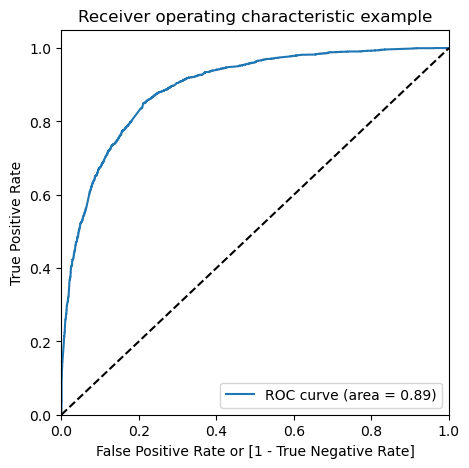

In [156]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# Step 8: Finding Optimal Cutoff Point

Optimal cut off probability is that prob where we get balanced sensitivity and specificity


In [157]:
#Let's create columns with different probability cutoffs 
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.702725,2240,1,1,1,1,1,1,1,1,1,0,0
1,0,0.602592,113,1,1,1,1,1,1,1,1,0,0,0
2,1,0.755200,4132,1,1,1,1,1,1,1,1,1,0,0
3,0,0.130551,5573,0,1,1,0,0,0,0,0,0,0,0
4,0,0.014278,1109,0,1,0,0,0,0,0,0,0,0,0


In [158]:
#let's calculate accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

nums = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in nums:
    conm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(conm1))
    accuracy = (conm1[0,0]+conm1[1,1])/total1
    
    specificity = conm1[0,0]/(conm1[0,0]+conm1[0,1])
    sensitivity = conm1[1,1]/(conm1[1,0]+conm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.389557     1.000000     0.000000
0.1   0.1  0.650791     0.973193     0.445049
0.2   0.2  0.759494     0.922421     0.655521
0.3   0.3  0.801741     0.874492     0.755314
0.4   0.4  0.814241     0.779041     0.836703
0.5   0.5  0.815190     0.710804     0.881804
0.6   0.6  0.808228     0.636474     0.917833
0.7   0.7  0.783544     0.528026     0.946604
0.8   0.8  0.762184     0.441511     0.966822
0.9   0.9  0.711709     0.280666     0.986781


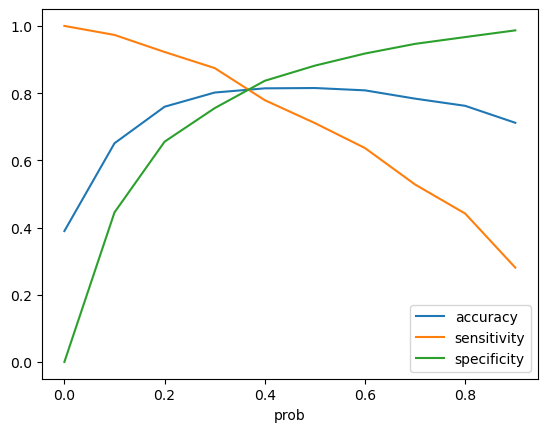

In [159]:
#Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()


# Observation:
    
From the curve above, 0.39 is the optimum point to take it as a cutoff probability.

In [160]:
#Let us make the final prediction using 0.39 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.39 else 0)
y_train_pred_final.head()


,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.702725,2240,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.602592,113,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.755200,4132,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.130551,5573,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.014278,1109,0,1,0,0,0,0,0,0,0,0,0,0


In [161]:
#Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.702725,2240,1,1,1,1,1,1,1,1,1,0,0,1,70
1,0,0.602592,113,1,1,1,1,1,1,1,1,0,0,0,1,60
2,1,0.755200,4132,1,1,1,1,1,1,1,1,1,0,0,1,76
3,0,0.130551,5573,0,1,1,0,0,0,0,0,0,0,0,0,13
4,0,0.014278,1109,0,1,0,0,0,0,0,0,0,0,0,0,1
5,0,0.034215,2282,0,1,0,0,0,0,0,0,0,0,0,0,3
6,1,0.905155,2976,1,1,1,1,1,1,1,1,1,1,1,1,91
7,0,0.464987,8431,0,1,1,1,1,1,0,0,0,0,0,1,46
8,1,0.786962,2770,1,1,1,1,1,1,1,1,1,0,0,1,79
9,1,0.996677,5790,1,1,1,1,1,1,1,1,1,1,1,1,100


In [162]:
#checking if 80% cases are correctly predicted based on the converted column.

checking = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking['final_predicted'].value_counts()


1    1933
0     529
Name: final_predicted, dtype: int64

In [164]:
#Check the precentage of final_predicted conversions

1933/float(1933+529)

0.7851340373679935

# Observation: 
Hence we can see that the final prediction of conversions have a target of 79% (78.5%) conversion as per the X Educations CEO's requirement . Hence this is a good model.

# Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [165]:
#Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.8140822784810127

In [166]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion1

array([[3212,  646],
       [ 529, 1933]], dtype=int64)

In [168]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [169]:
#Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)


0.7851340373679935

In [170]:
#Let us calculate specificity

TN / float(TN+FP)

0.8325557283566615

In [171]:
#Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))


0.16744427164333853


In [174]:
#Positive predictive value 

print (TP / float(TP+FP))


0.7495153160139589


In [175]:
#Negative predictive value

print (TN / float(TN+ FN))

0.8585939588345363


# Metrics - Precision and Recall

In [176]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion


array([[3402,  456],
       [ 712, 1750]], dtype=int64)

In [177]:
#Precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7932910244786945

In [178]:
#Recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)


0.710804224207961

# Precision and recall tradeoff

In [179]:
y_train_pred_final.Converted, y_train_pred_final.predicted


(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6315    1
 6316    1
 6317    0
 6318    0
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6315    0
 6316    1
 6317    0
 6318    0
 6319    0
 Name: predicted, Length: 6320, dtype: int64)

In [180]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)


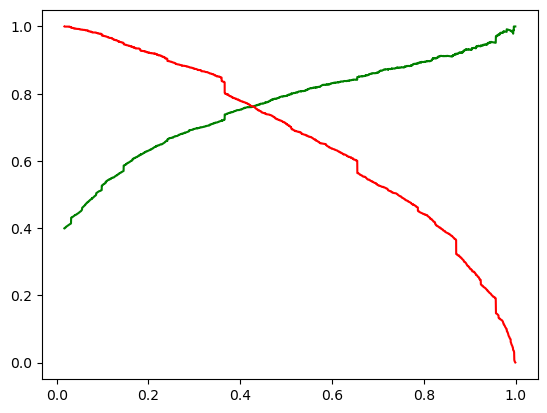

In [181]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Step 9: Making predictions on the test set

In [182]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [183]:
X_test = X_test[cols]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_SMS Sent,CurrentOccupation_No Information,CurrentOccupation_Working Professional,LastNotableActivity_Modified
2296,0,0.1875,0.665313,0,0,0,0,1,0,0,0
8697,0,0.4375,0.184032,0,0,0,0,1,0,0,0
7378,0,0.1250,0.163284,0,0,1,0,0,0,0,0
8631,0,0.3125,0.407307,0,0,0,0,1,0,0,1
4799,0,0.5000,0.744700,0,0,0,0,1,0,0,0


In [185]:
X_test_sm = sm.add_constant(X_test)


Making predictions on the test set

In [186]:
y_test_pred = res.predict(X_test_sm)

In [187]:
y_test_pred[:10]

2296    0.902230
8697    0.592207
7378    0.215207
8631    0.650823
4799    0.950833
4503    0.359222
7129    0.876417
1717    0.145723
8398    0.861040
5116    0.241093
dtype: float64

In [188]:
#Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [189]:
#Let's see the head

y_pred_1.head()

,0
2296,0.902230
8697,0.592207
7378,0.215207
8631,0.650823
4799,0.950833


In [190]:
#Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [191]:
#Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [192]:
#Removing the index for both dataframes to append them 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [193]:
#Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [194]:
y_pred_final.head()

,Converted,LeadId,0
0,1,2296,0.902230
1,0,8697,0.592207
2,0,7378,0.215207
3,0,8631,0.650823
4,1,4799,0.950833


In [195]:
#Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [197]:
#Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadId','Converted','Converted_Prob'], axis=1)


In [198]:
#Let's see the head of y_pred_final
y_pred_final.head()

,LeadId,Converted,Converted_Prob
0,2296,1,0.902230
1,8697,0,0.592207
2,7378,0,0.215207
3,8631,0,0.650823
4,4799,1,0.950833


In [199]:
#Based on cut off threshold using accuracy, sensitivity and specificity of 0.39%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.39 else 0)

In [200]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,2296,1,0.902230,1
1,8697,0,0.592207,1
2,7378,0,0.215207,0
3,8631,0,0.650823,1
4,4799,1,0.950833,1


In [202]:
#Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(10)

,LeadId,Converted,Converted_Prob,final_predicted,lead_score
0,2296,1,0.902230,1,90
1,8697,0,0.592207,1,59
2,7378,0,0.215207,0,22
3,8631,0,0.650823,1,65
4,4799,1,0.950833,1,95
5,4503,0,0.359222,0,36
6,7129,0,0.876417,1,88
7,1717,0,0.145723,0,15
8,8398,0,0.861040,1,86
9,5116,1,0.241093,0,24


In [203]:
#Checking if 80% cases are correctly predicted based on the converted column.

#Get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    788
0    227
Name: final_predicted, dtype: int64

In [204]:
# check the precentage of final_predicted conversions on test data

788/float(788+227)

0.7763546798029557

# Observation: 
Hence we can see that the final prediction of conversions have a target rate of 78% (77.6%) (Around 2 % short of the predictions made on training data set)

# Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity on test set


In [205]:
#Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8124769287559985

In [206]:
confusion1 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion1

array([[1413,  281],
       [ 227,  788]], dtype=int64)

In [207]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [208]:
#Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7763546798029557

In [209]:
#Let us calculate specificity
TN / float(TN+FP)

0.8341204250295159

# Precision and Recall metrics for the test set

In [210]:
#precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

#recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))


precision  0.7371375116931712
recall  0.7763546798029557


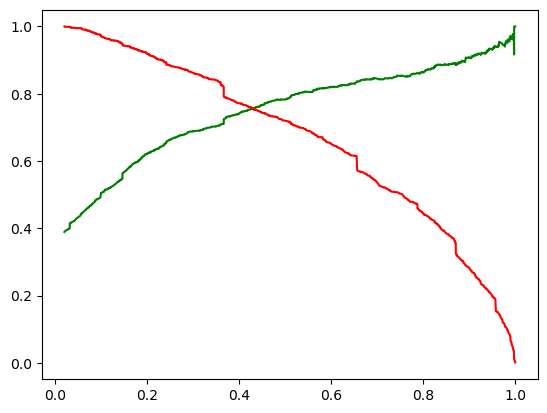

In [211]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Step 10: Conclusion

* While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal 
  cut off based on Sensitivity and Specificity for calculating the final prediction.
* Accuracy, Sensitivity and Specificity values of test set are around 81%, 77% and 83% which are approximately closer to 
  the respective values calculated using trained set.
* Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
  around 78%.
* So, overall this model seems to be good.

